In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [96]:
# read csv
df = pd.read_csv('admissions_data.csv')

In [97]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [98]:
df = df.drop('Serial No.', axis=1)

In [99]:
# check null values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [100]:
# check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [101]:
# stats summary
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [102]:
df.groupby(by='SOP').mean()

,GRE Score,TOEFL Score,University Rating,LOR,CGPA,Research,Chance of Admit
SOP,,,,,,,
1.0,304.000000,99.000000,1.166667,1.916667,7.765000,0.166667,0.538333
1.5,304.840000,100.600000,1.720000,2.420000,7.766800,0.240000,0.546400
2.0,307.395349,102.139535,2.162791,2.744186,8.006047,0.209302,0.589535
2.5,309.562500,103.343750,2.296875,2.929688,8.220625,0.359375,0.645312
3.0,313.525000,105.350000,2.750000,3.187500,8.362875,0.487500,0.678500
3.5,315.693182,107.034091,3.022727,3.443182,8.568977,0.602273,0.712045
4.0,321.224719,109.887640,3.640449,3.960674,8.857191,0.707865,0.782809
4.5,326.571429,112.857143,4.190476,4.166667,9.147937,0.793651,0.850000
5.0,327.023810,112.952381,4.595238,4.559524,9.270714,0.857143,0.885000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021BA5D8F248>,
      dtype=object)

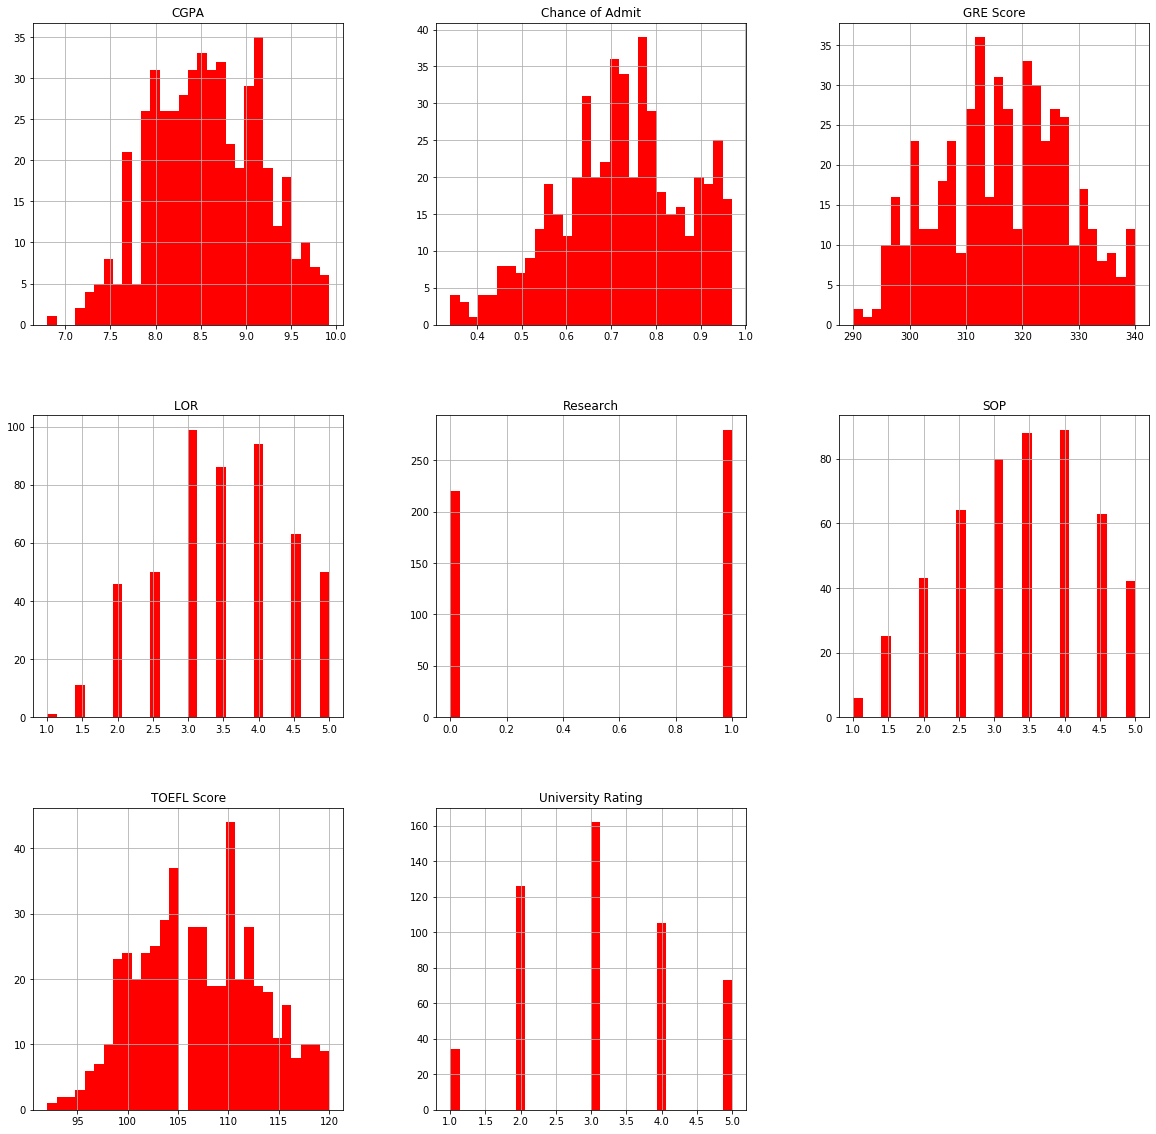

In [103]:
df.hist(bins=30, figsize=(20,20), color='r')

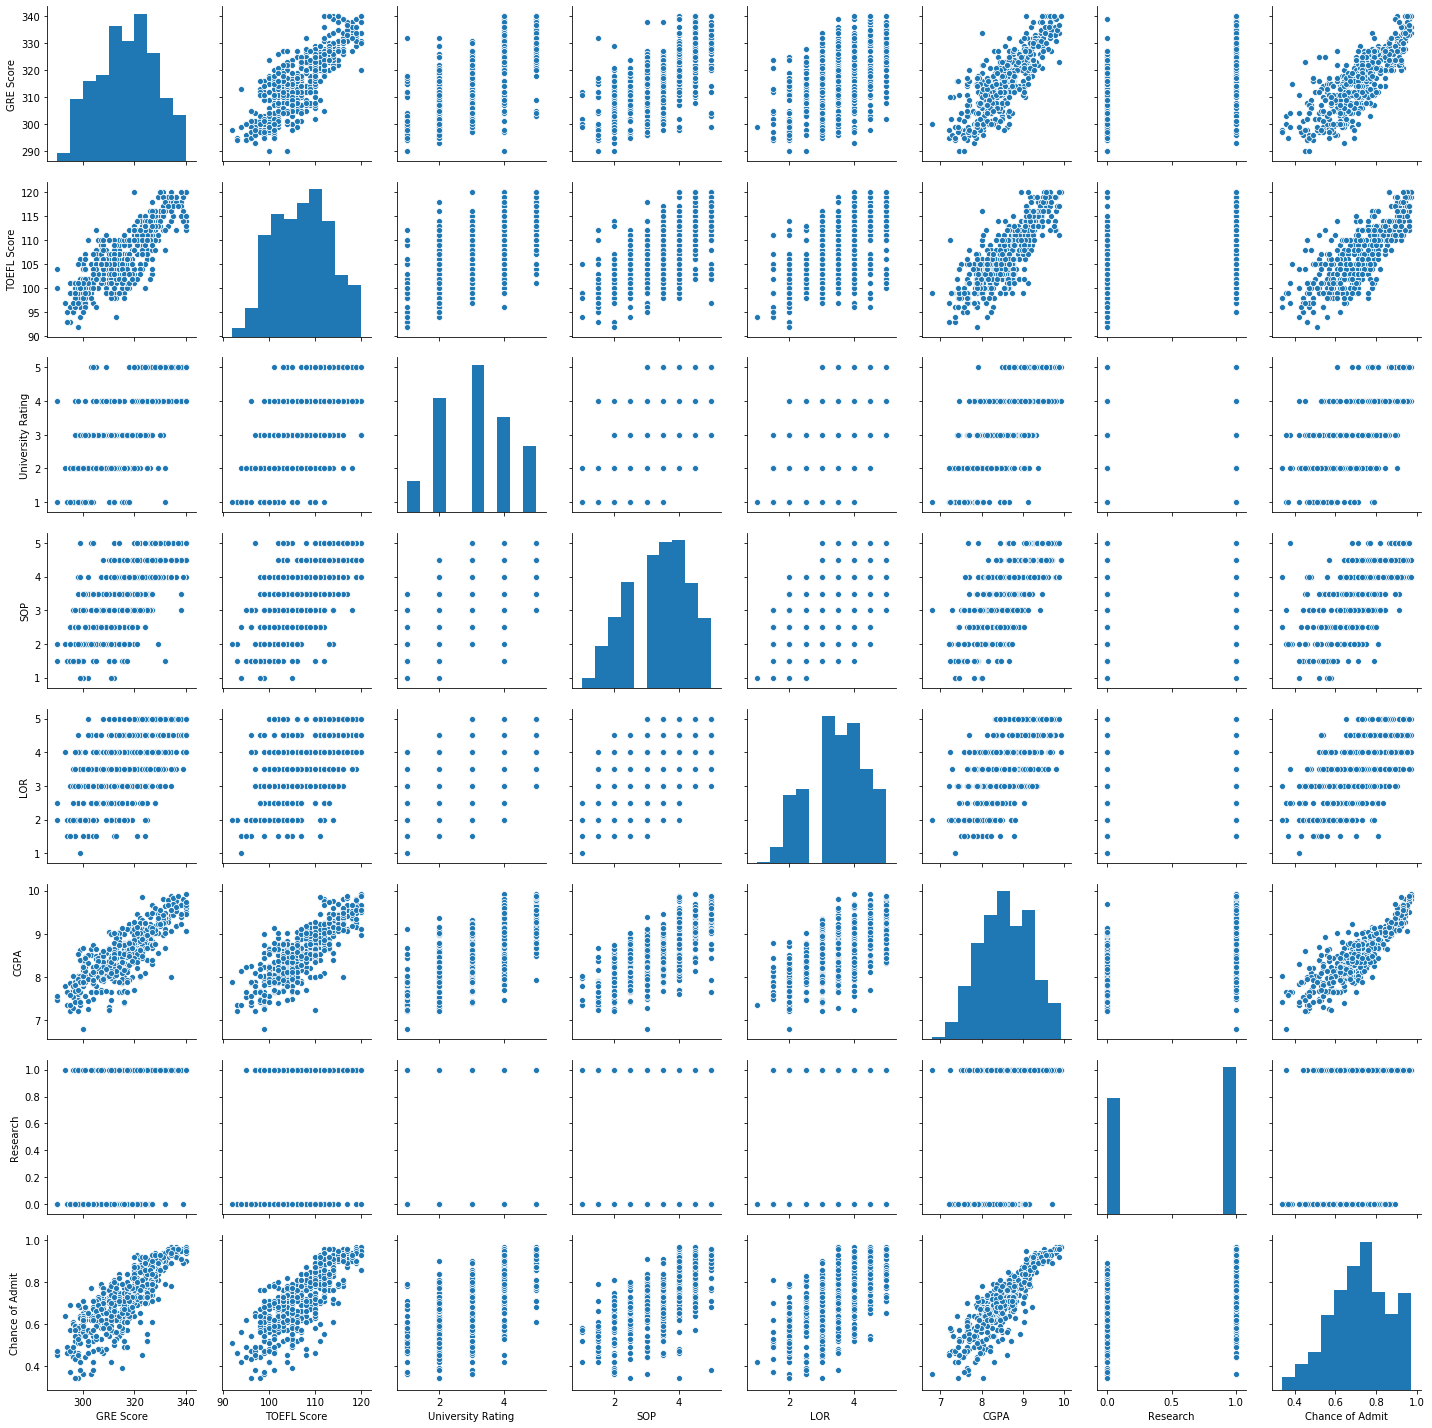

In [104]:
sns.pairplot(df)

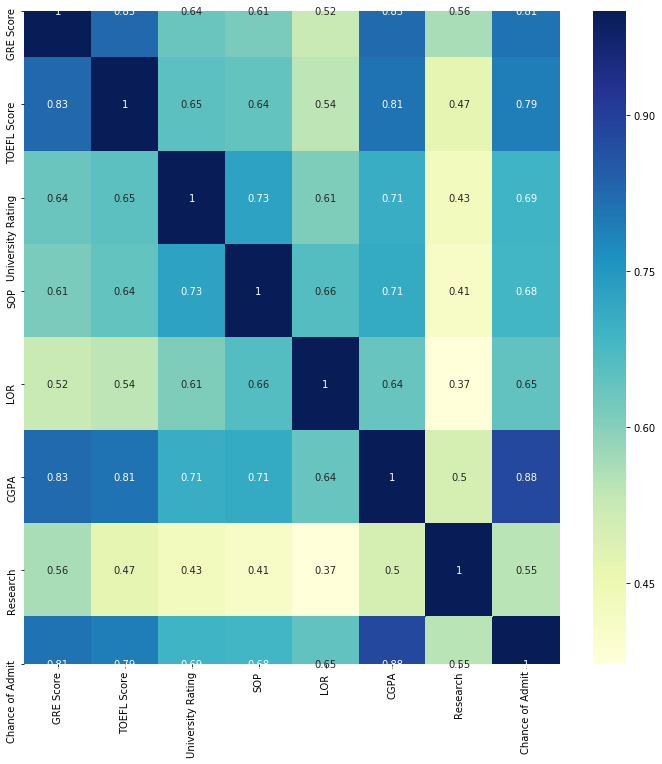

In [107]:
corr_mat = df.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_mat, annot=True, cmap="YlGnBu")

In [108]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [109]:
X = df.drop(columns=['Chance of Admit'])

In [110]:
y = df['Chance of Admit']

In [111]:
X = np.array(X)
y = np.array(y)

In [112]:
y = y.reshape(-1,1)

In [113]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [114]:
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [138]:
y_test_orig = scaler_y.inverse_transform(y_test)

# LINEAR REGRESSION

In [136]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [214]:
acc_lr = lr.score(X_test, y_test)
acc_lr

0.8416376859202049

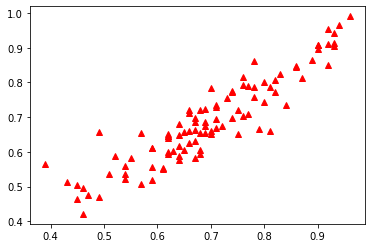

In [139]:
y_pred_lr = lr.predict(X_test)
y_pred_lr_orig = scaler_y.inverse_transform(y_pred_lr)
plt.plot(y_test_orig, y_pred_lr_orig, '^', color='r')

In [140]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

MSE = mean_squared_error(y_test_orig, y_pred_lr_orig)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_orig, y_pred_lr_orig)

print ("MSE : %.3f\nRMSE : %.3f\nMAE : %.3f" %(MSE, RMSE, MAE))

MSE : 0.003
RMSE : 0.052
MAE : 0.040


# DECISION TREE

In [178]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=5, min_samples_leaf=2)
dt.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [180]:
acc_dt = dt.score(X_test, y_test)
acc_dt

0.7632814921846471

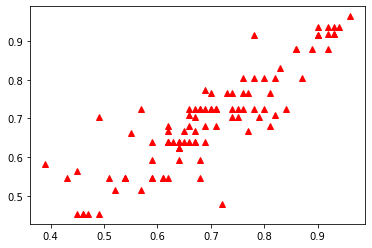

In [181]:
y_pred_dt = dt.predict(X_test)
y_pred_dt_orig = scaler_y.inverse_transform(y_pred_dt)
plt.plot(y_test_orig, y_pred_dt_orig, '^', color='r')

In [182]:
MSE = mean_squared_error(y_test_orig, y_pred_dt_orig)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_orig, y_pred_dt_orig)

print ("MSE : %.3f\nRMSE : %.3f\nMAE : %.3f" %(MSE, RMSE, MAE))

MSE : 0.004
RMSE : 0.064
MAE : 0.044


# RANDOM FOREST

In [207]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)

C:\Users\Yuvraj\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [209]:
acc_rf = rf.score(X_test, y_test)
acc_rf

0.8075283990471339

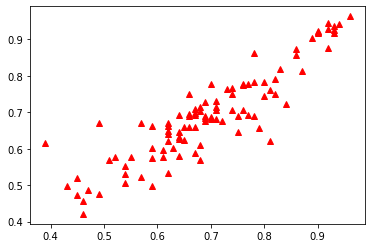

In [215]:
y_pred_rf = rf.predict(X_test)
y_pred_rf_orig = scaler_y.inverse_transform(y_pred_rf)
plt.plot(y_test_orig, y_pred_rf_orig, '^', color='r')

In [216]:
MSE = mean_squared_error(y_test_orig, y_pred_rf_orig)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_orig, y_pred_rf_orig)

print ("MSE : %.3f\nRMSE : %.3f\nMAE : %.3f" %(MSE, RMSE, MAE))

MSE : 0.003
RMSE : 0.058
MAE : 0.041


# NEURAL NETWORK

In [217]:
import tensorflow as tf

In [233]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(60, input_dim=7))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 60)                480       
_________________________________________________________________
batch_normalization_9 (Batch (None, 60)                240       
_________________________________________________________________
activation_9 (Activation)    (None, 60)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 61        
Total params: 781
Trainable params: 661
Non-trainable params: 120
_________________________________________________________________


In [234]:
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss='mse')

In [235]:
hist = model.fit(X_train, y_train, epochs=100, batch_size=20)

Epoch 1/100
20/20 [==============================] - 0s 3ms/step - loss: 1.6431
Epoch 2/100
20/20 [==============================] - 0s 3ms/step - loss: 0.5622
Epoch 3/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3721
Epoch 4/100
20/20 [==============================] - 0s 3ms/step - loss: 0.3196
Epoch 5/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2675
Epoch 6/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2505
Epoch 7/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2685
Epoch 8/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2844
Epoch 9/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2425
Epoch 10/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2526
Epoch 11/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2439
Epoch 12/100
20/20 [==============================] - 0s 2ms/step - loss: 0.2678
Epoch 13/100
20/20 [=================

In [239]:
acc_nn = 1 - model.evaluate(X_test, y_test)
acc_nn

4/4 [==============================] - 0s 2ms/step - loss: 0.1575


0.8424981385469437

Text(0, 0.5, 'Training Loss')

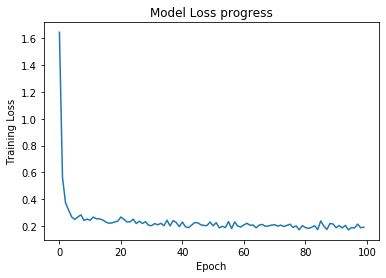

In [240]:
plt.plot(hist.history['loss'])
plt.title('Model Loss progress')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')

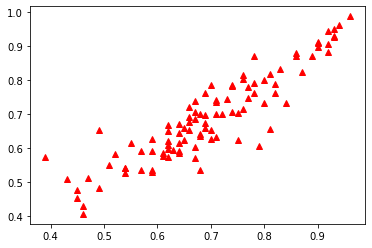

In [241]:
y_pred_nn = model.predict(X_test)
y_pred_nn_orig = scaler_y.inverse_transform(y_pred_nn)
plt.plot(y_test_orig, y_pred_nn_orig, '^', color='r')

In [242]:
MSE = mean_squared_error(y_test_orig, y_pred_nn_orig)
RMSE = np.sqrt(MSE)
MAE = mean_absolute_error(y_test_orig, y_pred_nn_orig)

print ("MSE : %.3f\nRMSE : %.3f\nMAE : %.3f" %(MSE, RMSE, MAE))

MSE : 0.003
RMSE : 0.056
MAE : 0.041
